Show, analyze and visualize the LSO results.

In [55]:
import numpy as np

data_file = '/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/debug_05/bo/iter_0/data.npz'

with np.load(data_file, allow_pickle=True) as npz:
    print(npz.files)
    X_train = npz['X_train'].astype(np.float32)
    y_train = npz['y_train'].astype(np.float32)

['X_train', 'X_test', 'y_train', 'y_test']


In [2]:
# Display tensor (3, 265, 256) as image
import matplotlib.pyplot as plt
import numpy as np

def show_tensor(tensor):
    # Convert to numpy array
    tensor = (tensor + 1) / 2
    img = tensor.permute(1, 2, 0).numpy()
    # Clip values to [0, 1]
    img = np.clip(img, 0, 1)
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

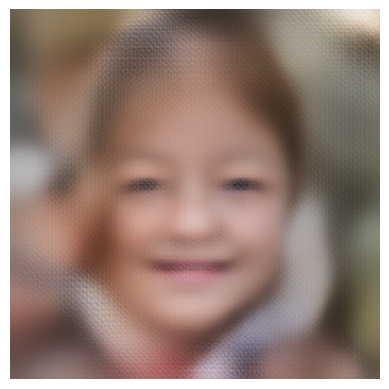

In [6]:
import torch

tensor_0 = torch.load('/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/lso_gp_02/data/samples/iter_80/img_tensor/tensor_4.pt', weights_only=False)

show_tensor(tensor_0)

In [7]:
# npz file to table
import pandas as pd
import numpy as np
results = np.load("/pfs/work9/workspace/scratch/ma_mgraevin-optdif/results/lso_gp_01/results.npz", allow_pickle=True)

print(f"Parameters: {results['params']}")

# Convert the npz file to a pandas DataFrame
df = pd.DataFrame({
    #'opt_points': list(results['opt_points']),
    'opt_point_properties': list(results['opt_point_properties']),
    #'opt_latent_points': list(results['opt_latent_points']),
    #'opt_sd_latent_points': list(results['opt_sd_latent_points']),
    'opt_model_version': list(results['opt_model_version']),
})

df

Parameters: ['src/lso.py', '--device', 'cuda', '--seed', '42', '--img_dir', 'data/ffhq/images1024x1024', '--img_tensor_dir', 'data/ffhq/pt_images', '--attr_path', 'data/ffhq/ffhq_smile_scores_scaled.json', '--max_property_value', '1', '--min_property_value', '0', '--batch_size', '128', '--num_workers', '4', '--val_split', '0', '--weight_type', 'uniform', '--query_budget', '100', '--retraining_frequency', '5', '--n_retrain_epochs', '0.1', '--n_init_retrain_epochs', '1', '--result_path', 'results/lso_gp_01/', '--sd_vae_path', 'stabilityai/stable-diffusion-3.5-medium', '--latent_model_config_path', 'models/latent_vqvae/configs/sd35m_to_512d_attn.yaml', '--latent_model_ckpt_path', 'models/latent_vqvae/version_5/checkpoints/last.ckpt', '--predictor_path', 'models/classifier/celeba_smile/predictor_128_scaled3.pth.tar', '--scaled_predictor', 'True', '--predictor_attr_file', 'models/classifier/celeba_smile/attributes.json', '--bo_surrogate', 'GP', '--n_out', '5', '--n_starts', '20', '--n_sampl

,opt_point_properties,opt_model_version
0,3.439058,0
1,0.312089,0
2,1.833568,0
3,0.885752,0
4,1.687476,0
...,...,...
95,1.294742,19
96,1.497864,19
97,2.247327,19
98,1.926510,19


In [8]:
df_grouped = df.groupby('opt_model_version')['opt_point_properties'].apply(list).apply(lambda x: x[:5]).apply(pd.Series)
df_grouped.columns = [f'tensor_{i}' for i in range(5)]
df_grouped

,tensor_0,tensor_1,tensor_2,tensor_3,tensor_4
opt_model_version,,,,,
0,3.439058,0.312089,1.833568,0.885752,1.687476
1,3.495967,1.564213,1.064801,3.528917,2.398322
2,1.971747,2.204233,3.060877,2.053379,1.220560
3,2.447177,1.695049,2.408144,2.258035,2.982532
4,1.688434,2.171603,1.369077,2.596168,2.255634
5,2.345344,2.659507,2.603275,1.929080,2.071833
6,2.590004,1.446566,1.036700,1.464275,1.277140
7,1.526467,1.460626,2.260741,1.207626,2.550456
8,1.126712,3.540267,1.879111,2.170830,3.225278


In [9]:
df_grouped_mean = df_grouped.mean(axis=1)
df_grouped_mean = df_grouped_mean.reset_index()
df_grouped_mean.columns = ['opt_model_version', 'mean']
df_grouped_mean

,opt_model_version,mean
0,0,1.631589
1,1,2.410444
2,2,2.102159
3,3,2.358188
4,4,2.016183
5,5,2.321808
6,6,1.562937
7,7,1.801183
8,8,2.388440
9,9,2.058766


In [10]:
# group and extract mean, min, and max over the first 5 tensors
df_grouped_stats = df_grouped.agg(['mean', 'min', 'max'], axis=1).reset_index()
df_grouped_stats

,opt_model_version,mean,min,max
0,0,1.631589,0.312089,3.439058
1,1,2.410444,1.064801,3.528917
2,2,2.102159,1.220560,3.060877
3,3,2.358188,1.695049,2.982532
4,4,2.016183,1.369077,2.596168
5,5,2.321808,1.929080,2.659507
6,6,1.562937,1.036700,2.590004
7,7,1.801183,1.207626,2.550456
8,8,2.388440,1.126712,3.540267
9,9,2.058766,1.653759,2.372846


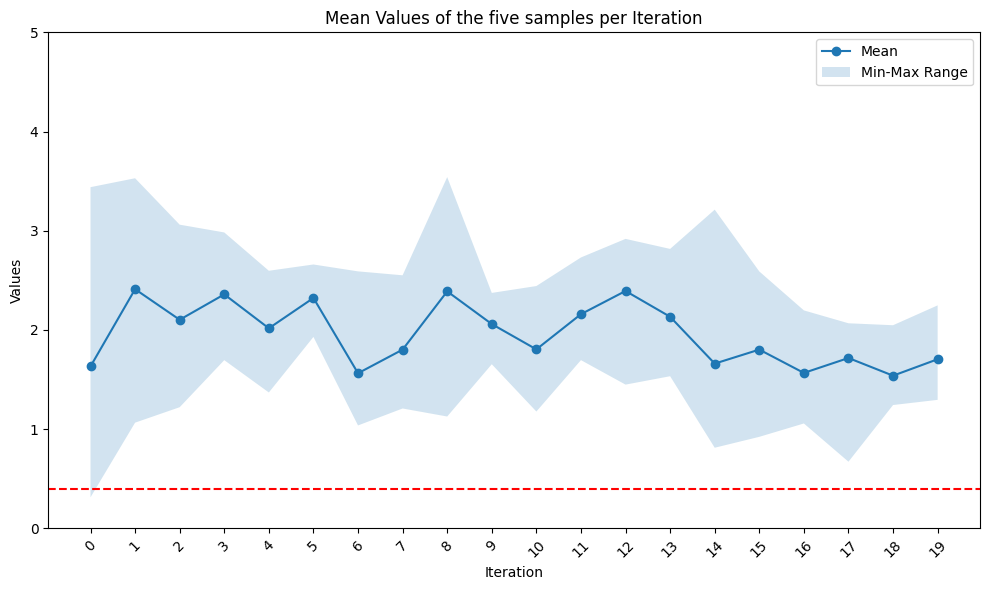

In [11]:
# visualize the mean values
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_grouped_mean['opt_model_version'], df_grouped_stats['mean'], marker='o', label='Mean')
ax.fill_between(df_grouped_mean['opt_model_version'], df_grouped_stats['min'], df_grouped_stats['max'], alpha=0.2, label='Min-Max Range')
ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title('Mean Values of the five samples per Iteration')
ax.set_ylim(0, 5)
ax.axhline(y=0.4, color='red', linestyle='--')
plt.xticks(ticks=range(len(df_grouped_mean['opt_model_version'])), labels=df_grouped_mean['opt_model_version'], rotation=45)
plt.tight_layout()
plt.show()